In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model

sb.set()

In [22]:
data = pd.read_csv("merged_data.csv")
noGK = data[data.Pos != "GK"]
noGK = noGK[noGK.Player != "Luca Zidane"]
noGK['Pos'].value_counts()

DF      751
MF      481
FW      321
FWMF    235
MFFW    192
MFDF     54
DFMF     47
DFFW     30
FWDF     23
Name: Pos, dtype: int64

In [3]:
positions = [(noGK.Pos == "FW") | (noGK.Pos == "FWMF") | (noGK.Pos == "FWDF"),
             (noGK.Pos == "MF") | (noGK.Pos == "MFFW") | (noGK.Pos == "MFDF"),
             (noGK.Pos == "DF") | (noGK.Pos == "DFMF") | (noGK.Pos == "DFFW")]

posNames = ["Forward","Midfielder","Defender"]
noGK['gPos'] = np.select(positions,posNames) 

In [4]:
noGK['gPos'].value_counts()

Defender      828
Midfielder    727
Forward       579
Name: gPos, dtype: int64

In [5]:
forwards = noGK[(noGK.gPos == "Forward")]
midfielders = noGK[(noGK.gPos == "Midfielder")]
defenders = noGK[(noGK.gPos == "Defender")]

In [6]:
forwards['Pos'].value_counts()

FW      321
FWMF    235
FWDF     23
Name: Pos, dtype: int64

In [7]:
midfielders['Pos'].value_counts()

MF      481
MFFW    192
MFDF     54
Name: Pos, dtype: int64

In [8]:
defenders['Pos'].value_counts()

DF      751
DFMF     47
DFFW     30
Name: Pos, dtype: int64

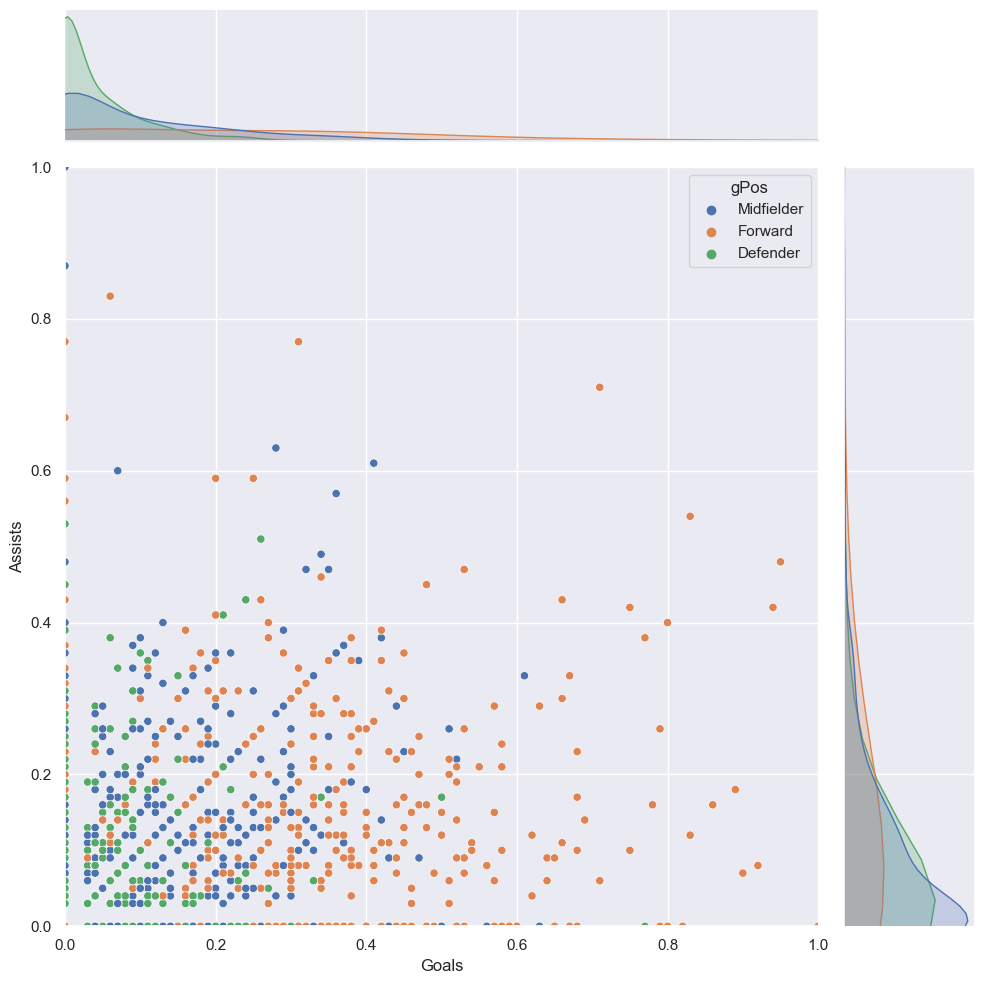

In [9]:
sb.jointplot(data=noGK,
                 x="Goals",
                 y="Assists",
                 xlim = {0,1},
                 ylim = {0,1},
                 height = 10,
                 hue="gPos")

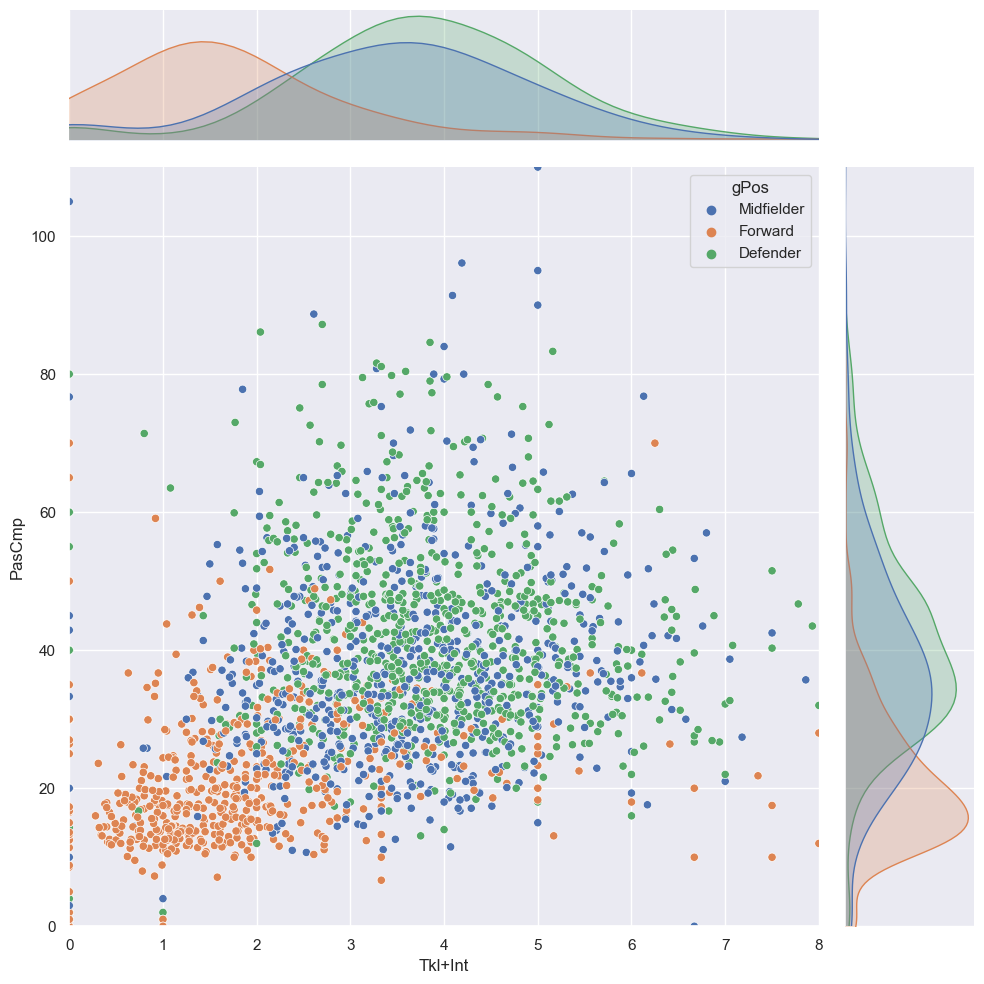

In [10]:
sb.jointplot(data=noGK,
                 x="Tkl+Int",
                 y="PasCmp",
                 xlim = {0,8},
                 ylim = {0,110},
                 height = 10,
                 hue="gPos")

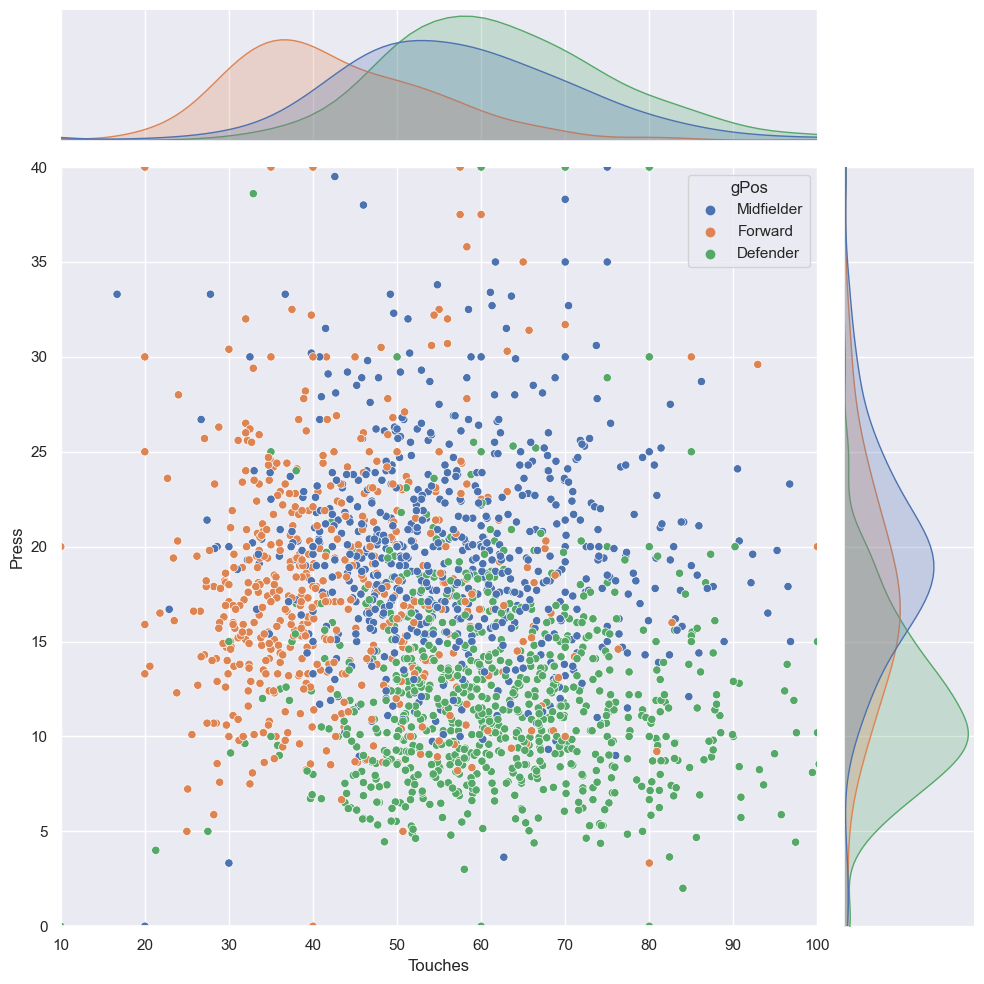

In [11]:
sb.jointplot(data=noGK,
                 x="Touches",
                 y="Press",                 
                 xlim = {10,100},
                 ylim = {0,40},
                 height = 10,
                 hue="gPos")

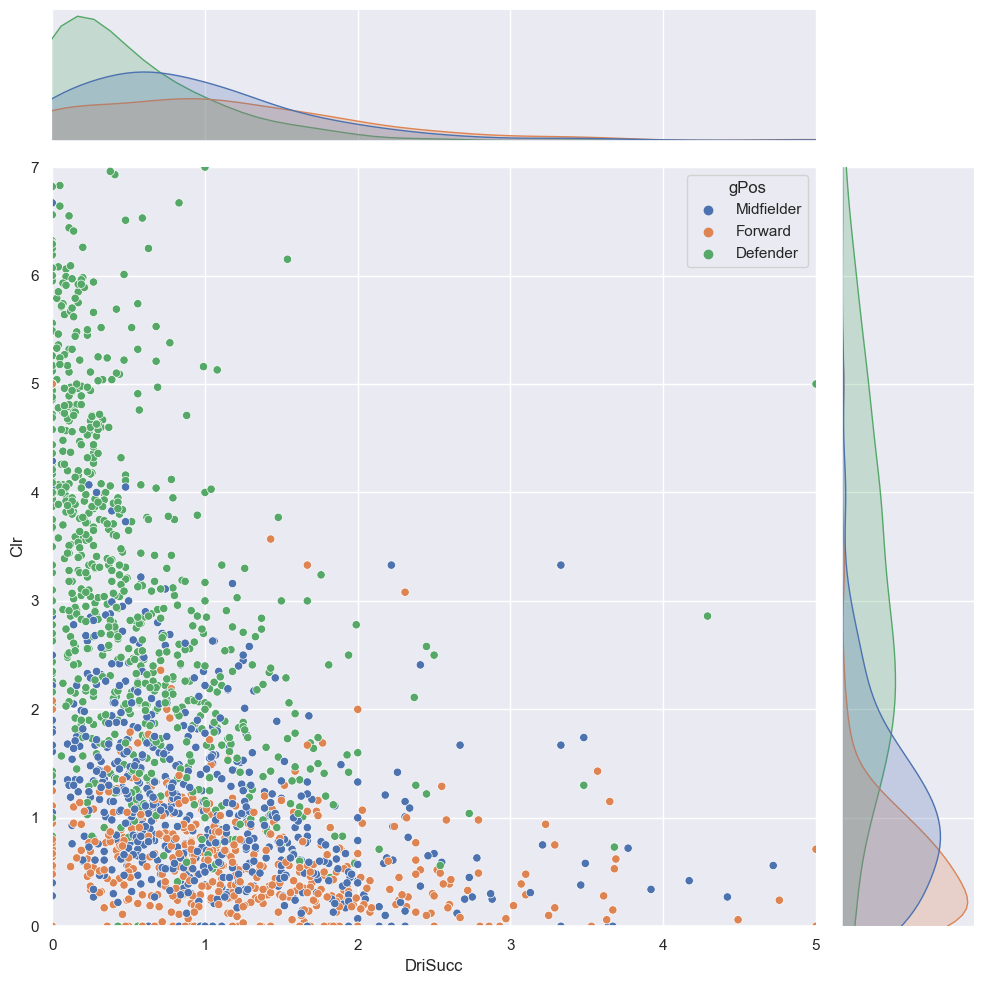

In [12]:
sb.jointplot(data=noGK,
                 x="DriSucc",
                 y="Clr",                 
                 xlim = {0,5},
                 ylim = {0,7},
                 height = 10,
                 hue="gPos")

In [13]:
X = np.asarray(midfielders[['Age', 'MP', 'Min', '90s', 'Goals', 'SoT', 'SoT%', 'G/Sh', 'G/SoT',
                            'ShoDist', 'ShoFK', 'ShoPK', 'PasTotCmp', 'PasTotCmp%',
                            'PasTotDist', 'PasTotPrgDist', 'PasShoCmp', 'PasShoAtt', 'PasShoCmp%',
                            'PasMedCmp', 'PasMedAtt', 'PasMedCmp%', 'PasLonCmp', 'PasLonAtt',
                            'PasLonCmp%', 'Assists', 'PasAss', 'Pas3rd', 'PPA', 'CrsPA', 'PasProg',
                            'PasAtt', 'PasLive', 'PasDead', 'PasFK', 'TB', 'PasPress', 'Sw', 'PasCrs',
                            'CK', 'PasGround', 'PasLow', 'PasHigh', 'PaswLeft', 'PaswRight', 'PaswHead',
                            'TI', 'PaswOther', 'PasCmp', 'PasOff', 'PasOut', 'PasInt', 'PasBlocks',
                            'SCA', 'ScaPassLive', 'ScaPassDead', 'ScaDrib', 'ScaSh', 'ScaFld', 'ScaDef',
                            'GCA', 'GcaPassLive', 'GcaPassDead', 'GcaDrib', 'GcaSh', 'GcaFld', 'GcaDef',
                            'Tkl', 'TklWon', 'TklDef3rd', 'TklMid3rd', 'TklAtt3rd', 'TklDri', 'TklDriAtt',
                            'TklDri%', 'TklDriPast', 'Press', 'PresSucc', 'Press%', 'PresDef3rd', 'PresMid3rd',
                            'PresAtt3rd', 'Blocks', 'BlkSh', 'BlkShSv', 'BlkPass', 'Int', 'Clr', 'Err', 'Touches',
                            'TouDefPen', 'TouDef3rd', 'TouMid3rd', 'TouAtt3rd', 'TouAttPen', 'TouLive', 'DriSucc',
                            'DriAtt', 'DriSucc%', 'DriPast', 'DriMegs', 'Carries', 'CarTotDist', 'CarPrgDist',
                            'CarProg', 'Car3rd', 'CPA', 'CarMis', 'CarDis', 'RecTarg', 'Rec', 'Rec%', 'RecProg',
                            'CrdY', 'CrdR', 'Fls', 'Fld', 'Off', 'Crs', 'TklW', 'PKwon', 'PKcon', 'Recov',
                            'AerWon', 'AerLost', 'AerWon%']])
Y = np.asarray(midfielders['market_value_in_eur'])

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.33, shuffle = True)

Score:  -0.07855898588756816
Weights:  [-9.00938750e+05 -5.50097196e+05 -3.62008812e+05  3.34425487e+07
  3.82027326e+07 -3.51018390e+06  7.03443746e+04 -4.98016520e+07
  8.68352463e+06 -9.26924056e+04 -3.32055212e+06 -1.82702241e+07
  1.11720209e+06  1.19821072e+05 -2.52078985e+04  1.70494108e+04
 -1.29254582e+05  5.35075987e+05 -1.65458373e+05 -1.41027384e+06
  1.79360872e+06  1.60140515e+04 -2.35447179e+06  2.75971745e+06
 -3.42624951e+04 -3.38164774e+06  1.01734979e+06  1.75863653e+06
  3.58696085e+06 -2.98116458e+06 -1.88553089e+06 -1.58616479e+07
  2.79281101e+07  2.84586880e+07 -1.76360294e+06 -4.04872340e+06
  3.18339348e+05  3.60519013e+05 -8.14259183e+05 -2.39050109e+05
 -1.66668635e+07 -1.72898406e+07 -1.67140777e+07  2.33332281e+06
  2.41382432e+06  1.99472102e+06  1.95037288e+06  1.49804214e+06
  1.11720209e+06  1.29292442e+06  5.44608101e+05  2.31101916e+06
  1.19471542e+06 -1.72909863e+08  1.71541096e+08  1.71079694e+08
  1.79687919e+08  1.82071095e+08  1.75196889e+08  1

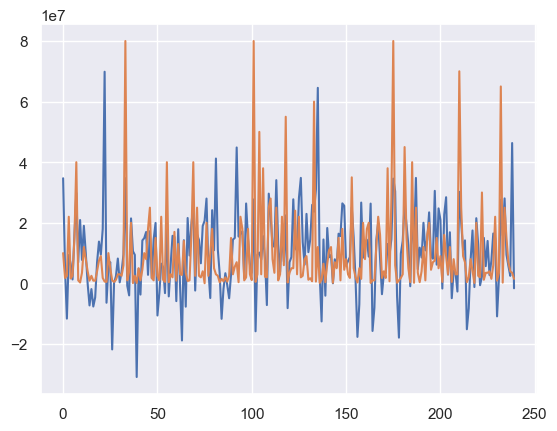

In [14]:
lineReg = linear_model.LinearRegression()
lineReg.fit(X_train,Y_train)
print('Score: ', lineReg.score(X_test, Y_test))
print('Weights: ', lineReg.coef_)

plt.plot(lineReg.predict(X_test))
plt.plot(Y_test)
plt.show()

Score:  0.10557882779871253
Weights:  [-9.07757655e+05 -5.21084817e+05 -1.42060853e+05  1.36481355e+07
  2.19808353e+07 -2.98068182e+06  4.16833868e+04 -1.74074258e+07
  4.42078502e+06 -3.75039282e+04 -6.54475828e+05 -3.21798352e+06
  8.97857564e+05  1.49285104e+05 -1.31350964e+04  1.78938127e+04
  4.94345981e+04  3.59409285e+05 -1.66731095e+05 -1.25308265e+06
  1.51115795e+06  1.74478249e+04 -2.42361973e+06  2.50997475e+06
 -3.25809402e+04 -4.38827451e+06  8.84978194e+05  1.72604616e+06
  3.58385289e+06 -2.93967180e+06 -1.82274997e+06 -5.20883741e+06
  3.89495901e+06  5.19057535e+06 -1.58514706e+06 -4.26967007e+06
  3.12770553e+05  4.01687755e+05 -7.49497203e+05 -2.85637663e+05
 -2.43172113e+06 -2.92869588e+06 -2.68998396e+06  1.96674655e+06
  2.03723448e+06  1.66330672e+06  1.79126424e+06  1.17531711e+06
  8.97857564e+05  1.52774204e+06  6.23521613e+05  1.85160671e+06
  1.02447455e+06  1.50199873e+06 -2.98413168e+06 -3.11733401e+06
  5.86707830e+06  6.39450602e+06 -1.11623357e+06  3.

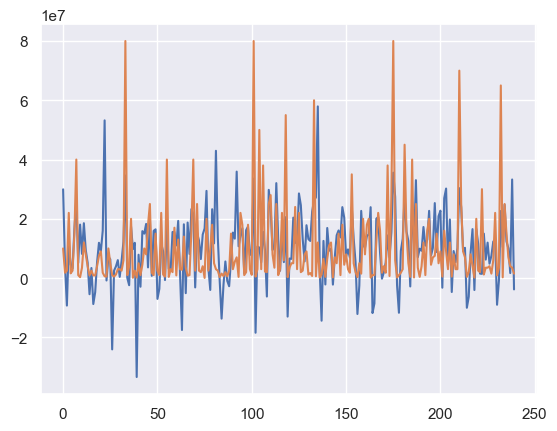

In [15]:
reg = linear_model.Ridge (alpha = .5)
reg.fit(X_train, Y_train)
print('Score: ', reg.score(X_test, Y_test))
print('Weights: ', reg.coef_)

plt.plot(reg.predict(X_test))
plt.plot(Y_test)
plt.show()

# Make prediciton with regression model

In [21]:
pred = reg.predict([[18,32,2790,31,0.1,0.39,27.3,0.07,0.25,17.3,0,0,41.9,84.5,736,168,19.3,21.8,88.4,17.5,19.5,89.6,4.29,6.26,68.6,0.26,1.1,3.65,1.16,0.06,4.45,49.5,48.5,1.03,0.71,0.23,10.8,1.58,0.55,0.06,38.5,5.58,5.45,8,38.4,1.35,0.26,0.58,41.9,0.29,0.71,1.81,1.32,3.16,2.16,0,0.29,0.13,0.39,0.19,0.61,0.39,0,0.06,0,0.06,0.1,2.1,1.29,0.58,1.1,0.42,0.61,1.71,35.8,1.1,20.8,7,33.6,4.16,11.2,5.48,2.06,0.13,0,1.94,1.42,0.97,0.06,65.8,1.68,12.7,38.5,19.1,3.29,65,1.61,3.32,48.5,1.81,0.06,47.2,204.4,112.7,5.19,1.58,0.48,2.06,1.87,57.5,48.9,85,5.74,0.29,0,1.42,3.29,0.16,0.55,1.29,0,0,7.87,1.29,1.65,44]])
print("Prediction is: ", pred[0])

Prediction is:  37653213.369408265
